# Ising models and Metropolis-Hastings algorithm

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import scipy as sp

from numpy.random import rand, random, randint, choice, normal, uniform 

### Estimate $\pi$ via MCMC

In [2]:
def mcmc_pi(N=1e5, delta=1.0):
    '''Using MCMC algorithm to estimate the value of pi'''
    
    pts = [] # array for points in square
    
    r_old = uniform(-1, 1, size=2) # 2 points within [0, 1] for x and y

    for i in range(N):
        
        dr = uniform(-delta, delta, size=2)
        
        r_new = r_old + dr
        
        if np.max(r_new) <= 1.0 and np.min(r_new) >= -1.0:
            
            pts.append(r_new)
            
            r_old = r_new
    
    pts  = np.array(pts)
    hits = pts[np.sqrt(pts[:,0]**2+pts[:,1]**2) < 1]
    
    return 4 * len(hits) / len(pts)

In [3]:
pi_value =  mcmc_pi(N=100000, delta=1.0)

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.435405850771657


Text(0.5, 1.0, 'Mean: 3.4328, Var: 0.1969')

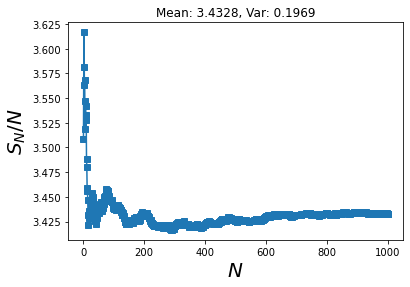

In [4]:
n_runs = np.arange(1,1001)
N = 100

#Estimate pi via a number of mcmc simulations
pi_vals      =  np.array([mcmc_pi(N) for i in n_runs] )
 
# Calculaate how mean improves with number of runs
sample_mean = np.cumsum(pi_vals )/n_runs

plt.plot(n_runs, sample_mean, '-s')

plt.xlabel('$N$',fontsize=20)
plt.ylabel('$S_N/N$', fontsize=20)

plt.title( f"Mean: {np.mean(pi_vals ):.4f}, Var: {np.std(pi_vals ):.4f}" )

## Ising models: The H atom of phase transitions



$$\boxed{H([s])= \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B \sum_i s_i}$$

<br>


$$\boxed{Z=\sum_{[s]}e^{-H([s])/k_B T}}$$

[[ 1  1 -1  1  1 -1  1 -1]
 [-1  1  1  1  1  1 -1  1]
 [ 1  1 -1  1 -1  1  1  1]
 [-1 -1 -1 -1 -1  1  1 -1]
 [-1 -1 -1  1 -1  1 -1  1]
 [ 1  1  1 -1  1 -1  1  1]
 [-1  1  1  1 -1 -1 -1  1]
 [ 1 -1 -1  1 -1  1  1 -1]]


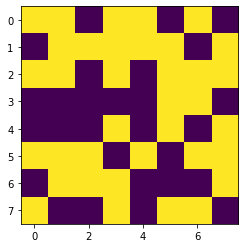

In [5]:
lattice = choice([-1,1],size=(8,8))

print(lattice)

plt.imshow(lattice)

In [6]:
lattice[:,:]

array([[ 1,  1, -1,  1,  1, -1,  1, -1],
       [-1,  1,  1,  1,  1,  1, -1,  1],
       [ 1,  1, -1,  1, -1,  1,  1,  1],
       [-1, -1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1,  1, -1,  1, -1,  1],
       [ 1,  1,  1, -1,  1, -1,  1,  1],
       [-1,  1,  1,  1, -1, -1, -1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1]])

In [7]:
N = 8
E = 0

for i in range(N-1):
    
    for j in range(N-1):
        
        E += lattice[i,j] * ( lattice[i,j+1] + lattice[i,j-1] + lattice[i+1,j] + lattice[i-1,j])

print(E)

-18


### Enforcing periodic boundary conditions

- **Method-1: Creating roll over indes using modulo operator %**

In [8]:
0%8, 1%8, 2%8, 3%8, 8%8
#lattice[8%8,5]

(0, 1, 2, 3, 0)

In [9]:
N = 8

for i in range(8):
    
    print(lattice[(i+1)%N , 3])

1
1
-1
1
-1
1
1
1


In [10]:
N = 8
E = 0

for i in range(N-1):
    
    for j in range(N-1):
        
        E += lattice[i,j] * ( lattice[(i+1)%N , j] + lattice[i,j-1] + lattice[i+1,j] + lattice[i-1,j])

print(E)

-24


- **Method-2: Creating roll over indes using numpy roll function**

In [11]:
np.roll(lattice, 1, axis = 0)

array([[ 1, -1, -1,  1, -1,  1,  1, -1],
       [ 1,  1, -1,  1,  1, -1,  1, -1],
       [-1,  1,  1,  1,  1,  1, -1,  1],
       [ 1,  1, -1,  1, -1,  1,  1,  1],
       [-1, -1, -1, -1, -1,  1,  1, -1],
       [-1, -1, -1,  1, -1,  1, -1,  1],
       [ 1,  1,  1, -1,  1, -1,  1,  1],
       [-1,  1,  1,  1, -1, -1, -1,  1]])

### Computing Thermodynamic quantities

#### Energy $E$

- **Energy of a configuration**

$$E[s] = H([s])= \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B \sum_i s_i$$. 


- **Ensemble average Energy**

$$ \langle E \rangle \approx \frac{1}{n_{MC}} \sum^{i=n_{MC}}_{i=1} H[s_i] $$

#### Magnetization

- **Total magnetization, $M$**  

$$M([s])=\sum_is_i $$

- **Magnetization per spin $m$** 

$$m([s])=\frac{1}{N}\sum_is_i =\frac{M}{N}$$

- **Ensemble averaged Magnetization** 

$$\langle M \rangle  \approx \frac{1}{n_{MC}} \sum^{i=n_{MC}}_{i=1} M[s_i]$$

#### Heat capacity $C_v$

Heat capacity is again the familiar expression established in our treatment of canonical ensemble. 

$$ C_V(T) = \Big (\frac{\partial E}{\partial T} \Big )_V= \frac{1}{k_B T^2} \big(\langle E^2 \rangle-\langle E \rangle^2 \big) $$


#### Susceptibility $\chi$

Magnetic susceptibility quantifies response of the ssytem to the variation of magnetic field.

$$\chi_T=\Big (\frac{\partial M}{\partial B} \Big )_T= \frac{1}{k_B T} \big(\langle M^2 \rangle-\langle M \rangle^2 \big) $$

#### Correlation function $c(i,j)$  and correlation length

At high temperatures, spins on an ising lattice point up and down randomly. While at low temperatures, all spins tend to align. To quantify the degree of alignment, we can define a quantity named correlation length $\xi$, which can be defined mathematically through correlation function $c(i,j)$ 

$$c(i,j)=\langle s_i-\langle s_i\rangle\rangle \langle s_j-\langle s_j\rangle\rangle$$

#### Parition function and Free energy 


$$Z=\sum_{[s]}e^{-\beta H([s])}=\sum_{[s]}e^{-\beta \big ( \sum_{\langle ij \rangle} J_{ij}s_i s_j - \mu B M \big )}$$

<br><br>

$$F=-\beta^{-1} log Z $$

- **Free energy as a function of M (Potential of mean force)**

<br>

$$Z(M) = \sum_{[s]} e^{-\beta H([s])} \delta (M-M([s]))$$

$$F(M)=-\beta^{-1} log Z(M)$$

The  Z(M) is a partial sum over states for which magnetization is equal to a particular value M as opposed to Z where summation is unrestricted. 

In [12]:
def getE(spins,N,J,B):    
    
    '''Compute energy of spin lattice by lopping over each spin 
        with periodic boundary conditions enforced 
        via rollover index implemented using modulo operator %'''
    
    E = 0
    
    for i in range(N):
        for j in range(N):   
            
            z = spins[(i+1)%N, j] + spins[(i-1)%N, j] +\
                spins[i,(j+1)%N] +  spins[i,(j-1)%N]
            
            E += -J*z*spins[i,j]/4 # Since we overcounted interactions 4 times divide by 4.

    return E - B*np.sum(spins) #Field contribution added

In [13]:
def getEE(spins,N,J,B):
    
    '''Compute energy of spin lattice by lopping over each spin 
    with periodic boundary conditions enforced 
    via numpy roll''' 
    
    z = np.roll(spins, 1, axis = 0) + np.roll(spins, -1, axis = 0) + \
    np.roll(spins, 1, axis = 1) + np.roll(spins, -1, axis = 1)

    eij = -J*spins*z/4  
    
    return np.sum(eij) - B*np.sum(spins)

In [14]:
spins = choice([-1,1],size=(1000,1000))

In [15]:
%%timeit
ee = getE(spins, 1000, 1, 0)
#print(ee)

1.21 s ± 8.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
ee2 = getEE(spins, 1000, 1, 0)
#print(ee2)

4.9 ms ± 98.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
def getM(s):
    
    return np.mean(s)

In [18]:
def getC(Ei, T):
    
    Ei = np.array(Ei)
    
    return (np.var(Ei))/T**2

In [19]:
def getXi(Mi, T):
    
    Mi = np.array(Mi)
    
    return (np.var(Mi))/T

In [20]:
def getCorr(spins, N, i, j):
    
    pass

### Sampliing of Boltzmann distribution (NVT). MC vs MCMC

How to compute the expectation value of an observable $A$. In theory everything is simple:

$$P(E_i)=\frac{e^{-\beta E_i}}{Z} = \frac{e^{-\beta E_i}}{\sum_i e^{-\beta E_i}}$$

$$\langle A\rangle = \sum_i A_iP(E_i)$$

**1. Question: What we know and what we want to know?**
- We don't always know the **(micro)states** $i$ of a system.
- We only know **macroscopic quantities:** temperature $T$ with $\beta = 1/(k_BT)$, volume, etc.

**2. Answer: MC sampling**
- Simulate different states of the system with Monte Carlo, according to the thermal probability function

**3. What are challanges?**
- most probabilities $P(E_k)$ are tiny => exponentially small
- there is an extremely large number of possible states


**4. Concludion: We need Importance sampling!**

- Use the Boltzmann probability $P(E_i)$ as probability distribution to generate $N$ samples:

$$\boxed{\langle A\rangle \rightarrow\frac{1}{N}\sum_{i=1}^N \underbrace{A_i}_{{\rm chosen}\ {\rm acc.}\ {\rm to}\ P(E_i)}}$$

**MCMC Simulation** Generating random walks in configuration space of thte system states.  

### Master Equation and Detailed Balance

**Random process:**

$$P(X_1, X_2, ... X_N) = P_1(X_1)\cdot P_2(X_2)... P_1(X_N)$$

<br>

**Probabilities**

$$P(X_1)$$

$$\sum_{X'} P(X') =1$$

**Markov chain:**

$$p(X_1, X_2, ... X_N) = P_1(X_1)\cdot P_2(X_2| X_1) \cdot P_2(X_3| X_2)... P_1(X_N | X_{N-1})$$

<br>

**Conditional (transition) probabilities:**

$$T(X_1 \rightarrow X_2) = P(X_2|X_1)$$

$$\sum_{X'} T(X\rightarrow X') =1 $$

**Probability of being at $X$ at $t+\Delta t$ given prior state at $(X',t)$**

$$P(X, t+\Delta t) = \sum_X' P(X', t) T(X' \rightarrow X, t)$$

**Master equation: A continuity equation in probability space.**

$$P(X, t+\Delta t) -P(X,t)= \sum_X' P(X', t) T(X' \rightarrow X, t) - P(X, t)\sum_{X'} T(X\rightarrow X')$$

$$\boxed{\frac{\partial P(X,t)}{\partial t} = \sum_X' P(X', t) w(X' \rightarrow X, t) - \sum_{X'} P(X, t) w(X\rightarrow X')}$$

- $w(X' \rightarrow X, t) = lim_{\Delta t \rightarrow 0}\frac{T(X' \rightarrow X, t)}{\Delta t}$

### Detailed Balance = Equilibrium

<br>

$$\boxed{\frac{\partial P(X,t)}{\partial t}  = \sum_{X'} P(X', t) w_{X'X} - \sum_{X'} P(X, t) w_{X X'}}=0$$

<br>

$$\boxed{ p_i w_{ij} = p_j w_{ji}  }$$

**Master equation for a two state dynamics**

$$\frac{dP(x_1,t)}{dt} = p_1 w_{12} - p_2 w_{21}$$

$$\frac{dP(x_2,t)}{dt} = p_2 w_{21} - p_1 w_{12}$$

### How to pick the moves for Markov chain?

$$[transition] = [move] \cdot [acceptance]$$

$$T(X\rightarrow X') = \alpha_{X X'}\cdot A_{X X'} $$

- $\alpha_{X X'}\geq 0$, $\alpha_{X X'} = \alpha_{X' X}$
<br>

- If $p(X') < p(X)$, $A_{XX'}=\frac{p(X')}{p(X)}$
<br>

- If $p(X') \geq p(X)$, $A_{XX'}=1$

**For 2D Ising model of size $(L,L)$**

- $\alpha_{X X'} = \frac{1}{L^2}$ 

Where $X$ and $X'$ differ in one spin configuration.

## Metropolis algorithm

${\bf i. Initialization.}$ Generate some initiaal configuration for spins $[s_0]=(s_1,...s_N)$. For instnace Choosing random orientation for each spins $(+1, -1)$ or giving them  the same orientation. 

${\bf ii. Attempt\,\, spin\,\, flip.\,\,}$ Pick a spin at random and flip it. E.g multiply by -1 so that +1 state becomes -1 and vice versa. this generated a new configuration $[s_1]$

${\bf iii. Acceptance/Rejection}$ Evaluate energy differene between old configuration $[s_{0}]$ and new one $[s_{1}]$ with flipped spin which has created in previous step. The $\Delta E=E_{1}-E_{0}$ is used for deciding weather the move is accepted or rejected in a way that is consistent with Boltzman distribution: 

$$w=\frac{P[s_{1}]}{P[s_{0}]}=exp\big(-\beta[E_{1}-E_{0}] \big ) $$

This is done by generating a unifor random number $r$ between $[0,1]$ and 

(a) if $r  \leq w$ Accept the spin flip thereby keeping $[s_1]$ and proceeding to try new spin flip via step ii.  

(b) if $r  > w$ reject the spin flip and set  $[s_1]=[s_0]$ and proceeding to try a new spin flip via step ii.

In [21]:
def initialize(N):
    
    '''Create square lattice of spin states, stored as 2D numpy array'''  
                        
    spins = choice([-1, 1], size=(N, N))  
    
    return spins    
    

def get_dE(spins, N, J, B, i, j): 
    
    '''Compute energy difference betwee old and spin flipped configuration.
    Peridoic boundary conditions have been imposed. 
    Study this function carefully and understand the meaning of each term'''
    
    z = spins[(i-1)%N, j] + spins[(i+1)%N, j] + spins[i, (j-1)%N] + spins[i, (j+1)%N]
    
    return 2*spins[i,j]*(J*z + B)


def mcmc(spins, N, J, B, T):
    
    ''' Attempt a flip of a randomly chosen spin at ij location of lattice''' 
    
    i, j = choice(N), choice(N)
    
    deltaE = get_dE(spins, N, J, B, i, j)
    
    if deltaE < 0 or np.exp(-deltaE/T) > random():
        
        '''For negative dE always accept or for positive dE distribute acceptance according to Boltzman dist'''
        
        spins[i,j] *= -1
    
    return spins

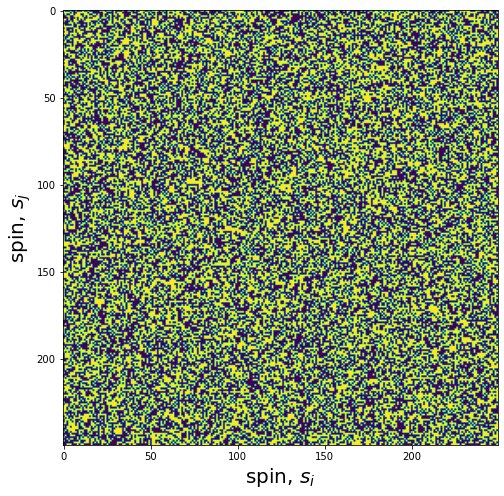

In [22]:
N=250
J=1
B=0
n_mcsteps = 1000

T = 0.5  # Try different temps. For J=1 vary T between 1-3 to see qualitative change. 

''' We run the Monte Carlo using a loop of n_mcsteps iterations. Later one we can create a more 
sophisticated object oriented code where one can simply execute single command. '''

spins = initialize(N)

for n in range(n_mcsteps):
    
    spins = mcmc(spins, N, J, B, T)

# Plot the lattice before and after
fig,ax=plt.subplots(figsize=(8,8))

ax.set_xlabel('spin, $ s_i$',fontsize=20)
ax.set_ylabel('spin, $ s_j$',fontsize=20)

im = ax.imshow(spins)

In [23]:
N = 64
J = 1
B = 0
T = 0.7  

n_steps = 100000
spins = initialize(N)

images=[]

In [24]:
for i in range(n_steps):
    
    images.append(spins.copy()) # use copy becasue spins keep on being updates
    
    spins = mcmc(spins, N, J, B, T)
%time

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


In [25]:
@widgets.interact(i=(0,n_steps-1))
def plot_image(i=0):
    fig,ax = plt.subplots(figsize=(8,8))
    ax.imshow(images[i])

interactive(children=(IntSlider(value=0, description='i', max=99999), Output()), _dom_classes=('widget-interac…

In [26]:
N=10
J=1
B=0

n_mcsteps = 1000

n_mcsteps2 = 20000

T = 1  # Try different temps. For J=1 vary T between 1-3 to see qualitative change. 

''' Record some observables form simulation and plot as a function of time to visually inspect equilibration'''

obs, obs2, obs3,  = [], [], []


spins = initialize(N)

for n in range(n_mcsteps):
    
    spins = mcmc(spins, N, J, B, T)

for n in range(n_mcsteps2):
    
    spins = mcmc(spins, N, J, B, T)
    
    obs.append(np.mean(spins))
    
#    obs2.append(spins[1,5])
    #obs3.append(getE(spins,N,J,B))

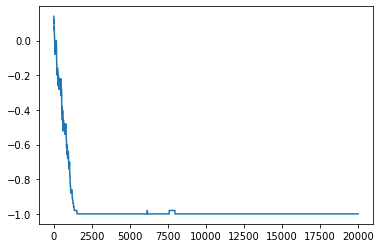

In [27]:
plt.plot(obs)

### Carry out explorative simulations

$\bf{i.}$ Test the dependence of observables on system size.

$\bf{ii.}$ Test the dependence of observables on initital conditions.

$\bf{iii.}$ Vary intensive parameters, e.g temperature and field strength. Investigate changes in observables such as magnetization, energy, susceptibility, heat capacity.

$\bf{iv.}$ How do we know if simulation has done enough sampling? How do we assess covnergence and errors? 

$\bf{v.}$ Think about alternative ways of accelerating and enhancing the sampling.

#### Parameter sweeps: run MC simulatons  of 2D Ising model at different  Ts

For more rigirous analysis we can either optimize the code (using cython or numba) or run on HPCs. 

In [28]:
N = 10                       # Small trial system, e.g 10-20 spins
J = 1
B=0
Ts = np.linspace(1, 4, 50) #vary temp

n_mcsteps=10000   # Equilibrate!
n_mcsteps2=20000   # Collect data!


###Carry out mulitple MC runs at differnet Temperatures. This calculation may take ~5 mins. Think about equilibration, convergence and statistical errors

Es, Ms = [], []
Cs, Xis = [], []   

for T in Ts:
    
    Ei,Mi=[],[]
    
    spins = initialize(N)
    
    for n in np.arange(n_mcsteps):
        
        spins = mcmc(spins, N, J, B, T)
    
    for n in np.arange(n_mcsteps2):  
        
        spins = mcmc(spins, N, J, B, T)
        
        Ei.append(getE(spins,N, J, B))
        Mi.append(getM(spins))
 

    # First L steps discarded as equilibration
    Es.append(np.mean(Ei))
    Ms.append(np.mean(Mi))
    
    # C and Xi computed from energies 
    Cs.append(getC(Ei, T))
    Xis.append(getXi(Ei, T))

KeyboardInterrupt: 

Text(0, 0.5, 'Energy E')

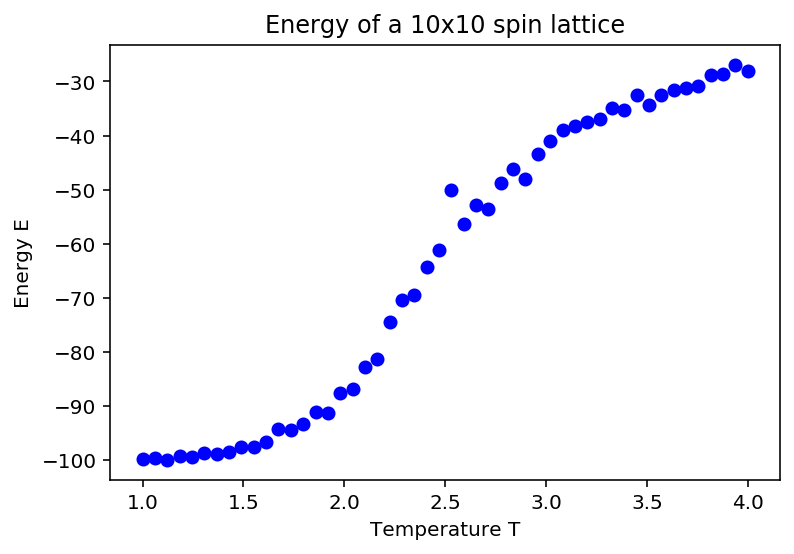

In [ ]:
plt.scatter(Ts, Es,color='blue')
plt.title("Energy of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Energy E")

Text(0, 0.5, 'Magnetization M')

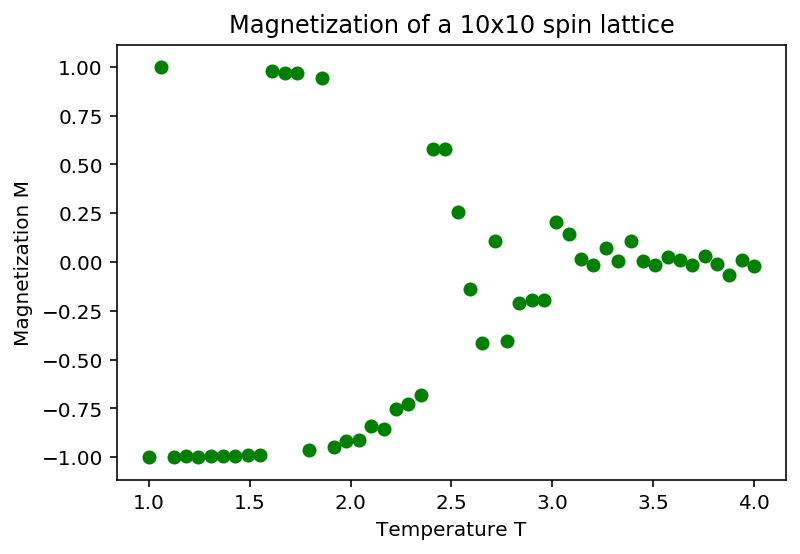

In [ ]:
plt.scatter(Ts, Ms,color='green')
plt.title("Magnetization of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Magnetization M")

Text(0, 0.5, 'Heat capacity $C_v(T)$')

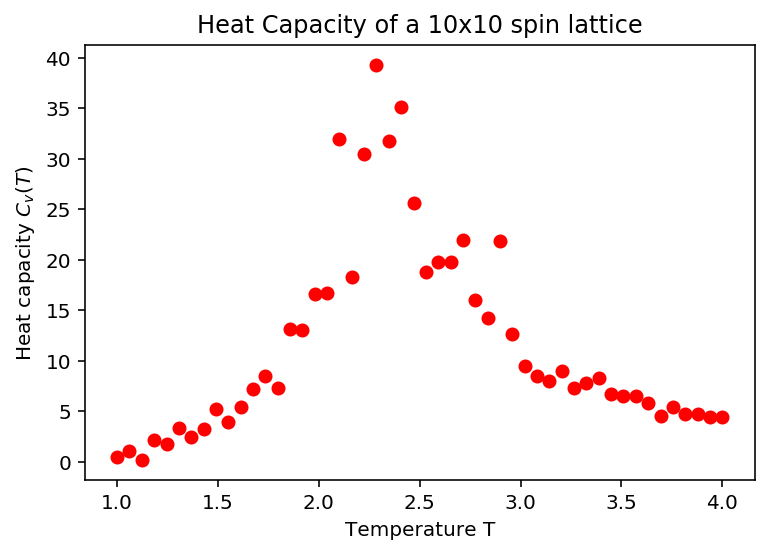

In [ ]:
plt.scatter(Ts, Cs,color='red')
plt.title("Heat Capacity of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Heat capacity $C_v(T)$")

Text(0, 0.5, 'Susceptibility $\\Xi(T)$')

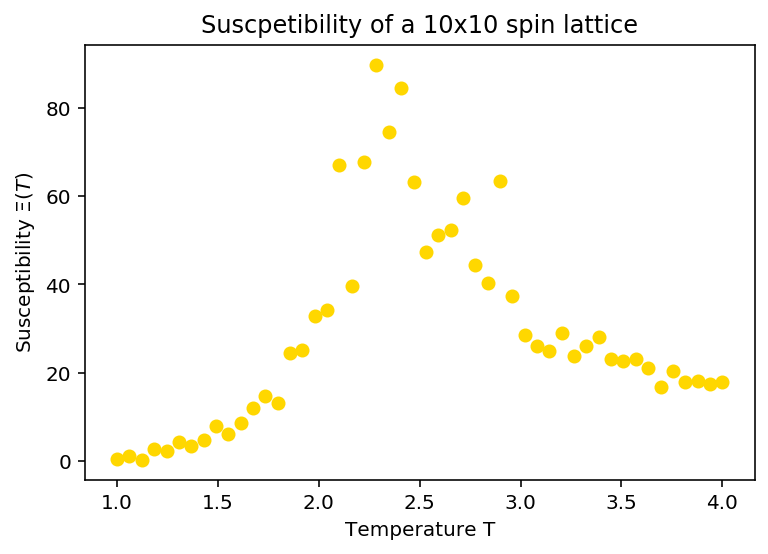

In [ ]:
plt.scatter(Ts, Xis,color='gold')
plt.title("Suscpetibility of a %dx%d spin lattice"%(N,N))
plt.xlabel("Temperature T")
plt.ylabel("Susceptibility $\Xi(T)$")

In [ ]:
#Ising2D python code optimized for speed

import numpy  as np
import pandas as pd
from numba import jit, njit

@njit
def compute_ising2d(spins, J, B):
    '''Computes thermodynamic variables given the spin lattice'''
  
    N = len(spins)

    E=0
    for i in range(N):
        for j in range(N):   
            z = spins[(i+1)%N, j] + spins[(i-1)%N, j] +spins[i,(j+1)%N] +  spins[i,(j-1)%N]
                
            E += -J*z*spins[i,j]/4 # Since we overcounted interactions 4 times divide by 4.

    #Energy
    E = E/N - B*np.mean(spins) 

    #Magnetization
    M   = np.mean(spins)

    return M, E  

@njit
def run_ising2d(spins, J, B, T, n_steps, out_freq):

    #Initialize data arrays
    M, E, traj = [], [], []
    N = len(spins)

    for step in range(n_steps):

        #Pick random spin
        i, j = np.random.randint(N), np.random.randint(N)

        #Compute energy change due to a flip of spin at i,j
        z  = spins[(i+1)%N, j] + spins[(i-1)%N, j] + spins[i, (j+1)%N] + spins[i, (j-1)%N] 
        dE = 2*spins[i,j]*(J*z + B)

        #Metropolis condition
        if dE <= 0 or np.exp(-dE/T) > np.random.rand():
          
            spins[i,j] *= -1 

        #Compute and store data
        if step % out_freq == 0:

            M_t, E_t = compute_ising2d(spins, J, B)
            
            M.append(M_t)
            E.append(E_t)
            traj.append(spins.copy())

    return traj, E, M

In [ ]:
%%time
traj, E, M = run_ising2d(spins=np.ones((120, 120)), J=1, B=0, T=3, n_steps=int(1e7), out_freq = int(1e3))

CPU times: user 1.62 s, sys: 207 ms, total: 1.83 s
Wall time: 1.82 s


### Problems

### Problem-1

Revisit the example MCMC simulation for determining $\pi$ value. Vary the size of the displacement to determine the optimal size that generates quickest convergence to the value of $\pi$


### Problem-2 

Carry out MC simulation of 2D ising spin model for various lattice sizes $N= 16,32, 64$ at temperatures above and below critical e.g $T<T_c$ and $T>T_c$.   

- How long does it take to equilibrate system as a function of size and as a function of T?

- Plot some observables as a function of number of samples states to show that the system is carrying out some sort of random walk in the configurational space. 

- How do profiles of Energy vs T, Magnetization vs T and heat capacity vs T, and susceptibility vs T change as a function of size of our lattice. 

- Does $J>0$ and $J<0$ change the nature of phase transition?

### Problem-3

Compute correlation functions of spin variable, that is how correlated are spins as a function of distance on a lattice, $L$. $C(L)=\langle s_i s_{i+L}\rangle -\langle s_i\rangle \langle s_{i+L}\rangle $ Make sure to account for the periodic boundary conditions! 

> Note that you can pick a special tagged spin and calculate correlation function of taged spin ($s_13$ for instance) with any other as a function of lattice spearation  by averaging over produced MC configurations.  Or you can take advantage of the fact that there are no priviledged spins and average over many spins and average over MC configruations e.g $s_1, s_2, ...$. E.g you can pick a horizontal line of spins and run a summation for each fixed r_ab distance. 

### Problem-4

Take a 20 by 20 lattice and equilibriate the system with a value of extneral field B equal to +1. 
Now slowly change h to −1 in discrete steps during each of these steps, use the previously equilibriated
configuration as an input to the system to undergo equilibriation again.  

Caluclate average and variance quantities (e.g E, M, C etc). Notice anything interesing :)